# Week 5 Exercises


In [1]:
%pylab inline
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
tips.head(5)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Exercise 1

* How many people visited the restaurant each day of the week?

* Check: There were 152 visitors on Thursday.

In [2]:
value = tips.groupby("day")["size"].sum()
print(value)

day
Thur    152
Fri      40
Sat     219
Sun     216
Name: size, dtype: int64


## Exercise 2
* What was the average bill paid each day of the week?

* Check: The average bill on Thursday was $17.48.




In [3]:
avg_bill_by_day = tips.groupby("day")["total_bill"].mean()
print(avg_bill_by_day)


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


## Exercise 3
* For each restaurant visit, compute what percentage of the total bill was the tip, and then compute the average value of this percentage for male and for female customers.

* Check: The average tip for males was 15.76%.



In [4]:
tip_percentage = (tips['tip']/tips['total_bill'])*100
tip_percentage.groupby(tips['sex']).mean()

sex
Male      15.765055
Female    16.649074
dtype: float64

## Exercise 4

* Compute a DateFrame with 10 rows selected from the tips data: 5 rows with the the 5 highest total bills for smokers and 5 rows with the 5 highest total bills for non-smokers

* Check: The 5 highest bills for smokers were \\$50.81, \\$43.35, \\$44.30, \\$43.11 and \\$40.55.

In [5]:
df1 = tips[tips['smoker']=='Yes'].sort_values(by=["total_bill"],ascending=False).head(5)
df2 = tips[tips['smoker']=='No'].sort_values(by=["total_bill"],ascending=False).head(5)
df = [df1,df2]
df = pd.concat(df)
df

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
184,40.55,3.00,Male,Yes,Sun,Dinner,2
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
142,41.19,5.00,Male,No,Thur,Lunch,5
23,39.42,7.58,Male,No,Sat,Dinner,4


## Exercise 5
* Create a DataFrame with 4 rows selected from the tips data: a row with the highest total bill for a male smoker, a row with the highest total bill for a male non-smoker, and the same for a female smokers and a female non-smokers.

* Check: The highest bills were \\$50.81 for male smoker, \\$48.33 for a male non-smoker, \\$44.30 for a female smoker and \\$35.83 for a female non-smoker.

In [6]:
df1 = tips[(tips['sex']=="Male")& (tips['smoker']=="Yes")].sort_values(by=["total_bill"],ascending=False).head(1)
df2 = tips[(tips['sex']=="Male")& (tips['smoker']=="No")].sort_values(by=["total_bill"],ascending=False).head(1)
df3 = tips[(tips['sex']=="Female")& (tips['smoker']=="Yes")].sort_values(by=["total_bill"],ascending=False).head(1)
df4 = tips[(tips['sex']=="Female")& (tips['smoker']=="No")].sort_values(by=["total_bill"],ascending=False).head(1)

df = [df1,df2]
df = pd.concat(df)
df = [df,df3]
df = pd.concat(df)
df = [df,df4]
df = pd.concat(df)
df

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
238,35.83,4.67,Female,No,Sat,Dinner,3


# Exercise 6
* Create a DataFrame with two rows indicating if a customer was a male or a female, and columns indicating which day of the week the customer visited the restaurant. The value in a given row and column should be the amount of the largest tip that a customer of a given sex and visiting on a given day paid.

* Check: The highest tip paid on Thursday was \\$6.70 for males and \\$5.17 for females.

In [7]:
max_tip = pd.pivot_table(tips,index="sex", values="tip",  columns="day", aggfunc=np.max)
max_tip

day,Thur,Fri,Sat,Sun
sex,,,,
Male,6.70,4.73,10.0,6.5
Female,5.17,4.30,6.5,5.2


# Exercise 7


* Use Seaborn to make an interesting plot for the data and use your figure to explain an insight about the data.


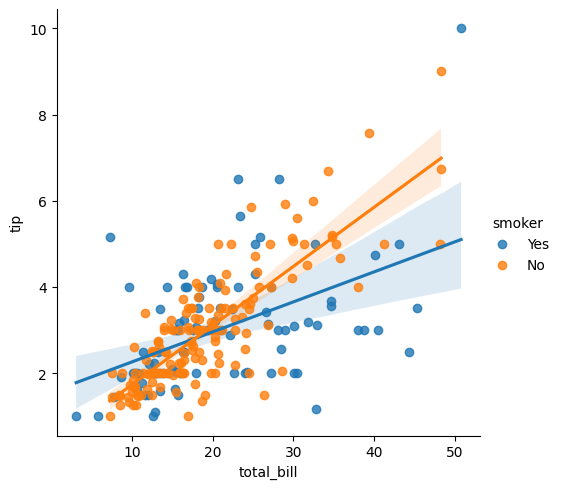

In [8]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker")

As we can see, it is apparent that non-smoking customers are more likely to pay higher tips on their bill as the total bill amount increases.



